In [132]:
#https://www.kaggle.com/code/adityapachpande/spaceship-titanic-orignalanalysis-v1
import matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [133]:
#Reading the Datafiles
train_df = pd.read_csv("../input/spaceship-titanic/train.csv")
test_df = pd.read_csv("../input/spaceship-titanic/test.csv")

In [134]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [135]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [136]:
print("train_df ->",train_df.shape)
print("test_df ->",test_df.shape)

train_df -> (8693, 14)
test_df -> (4277, 13)


In [137]:
train_df.describe()
print("__________")
test_df.describe()

__________


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


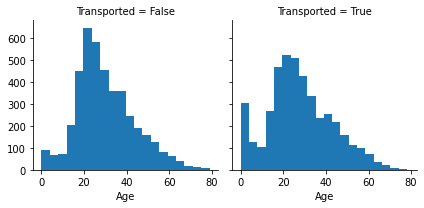

In [138]:
g = sns.FacetGrid(train_df, col='Transported')
g.map(plt.hist, 'Age', bins=20)

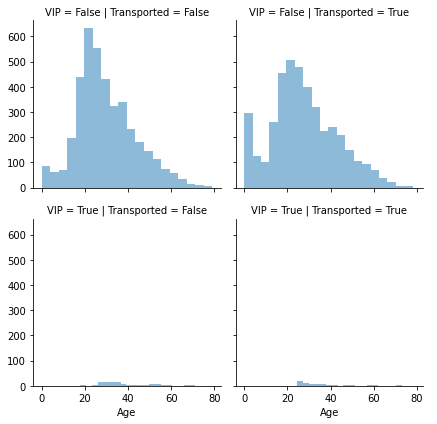

In [139]:
VIPgrid = sns.FacetGrid(train_df, col = 'Transported', row = "VIP")
VIPgrid.map(plt.hist, 'Age', alpha =.5, bins = 20)
VIPgrid.add_legend();

In [140]:
#Notes 
#It turns out that VIP does not make much of a difference.
#It is almost as close 
#Thus the difference in the graphs is due to the age.

Text(0.5, 0, 'Age (years)')

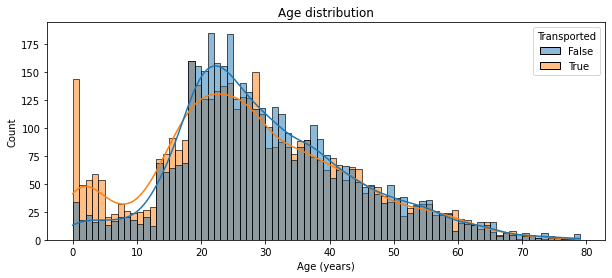

In [141]:
plt.figure(figsize=(10,4))
sns.histplot(data=train_df, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Age distribution')
plt.xlabel('Age (years)')

In [142]:
# Notes:
# 0-18 year olds were more likely to be transported
# 18-25 year olds were less likely to be transported
# Over 25 year olds were about equally likely to be transported than not.

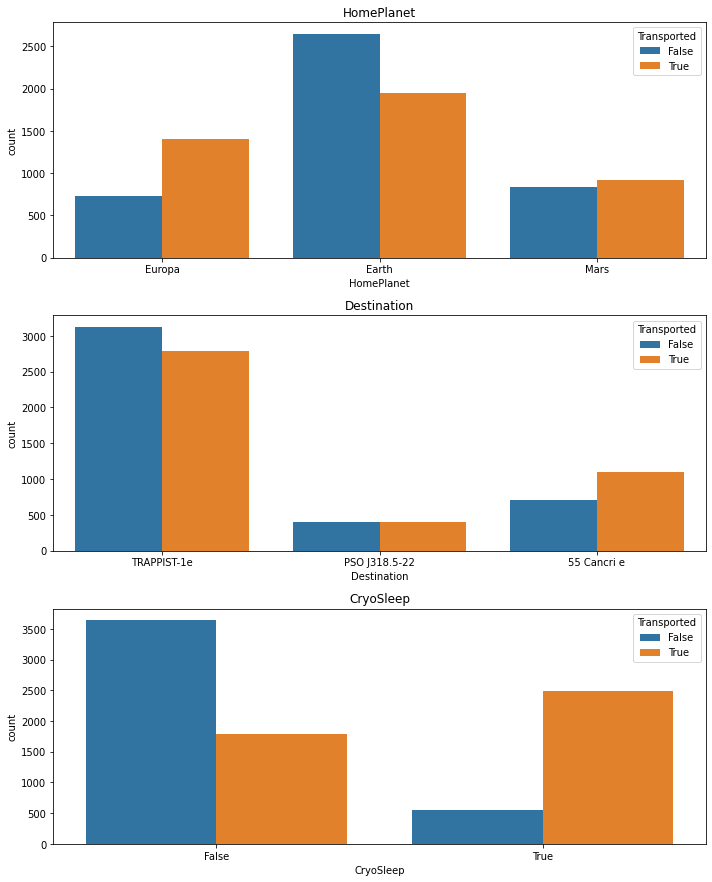

In [143]:
# Categorical features
feats=['HomePlanet','Destination','CryoSleep']
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()

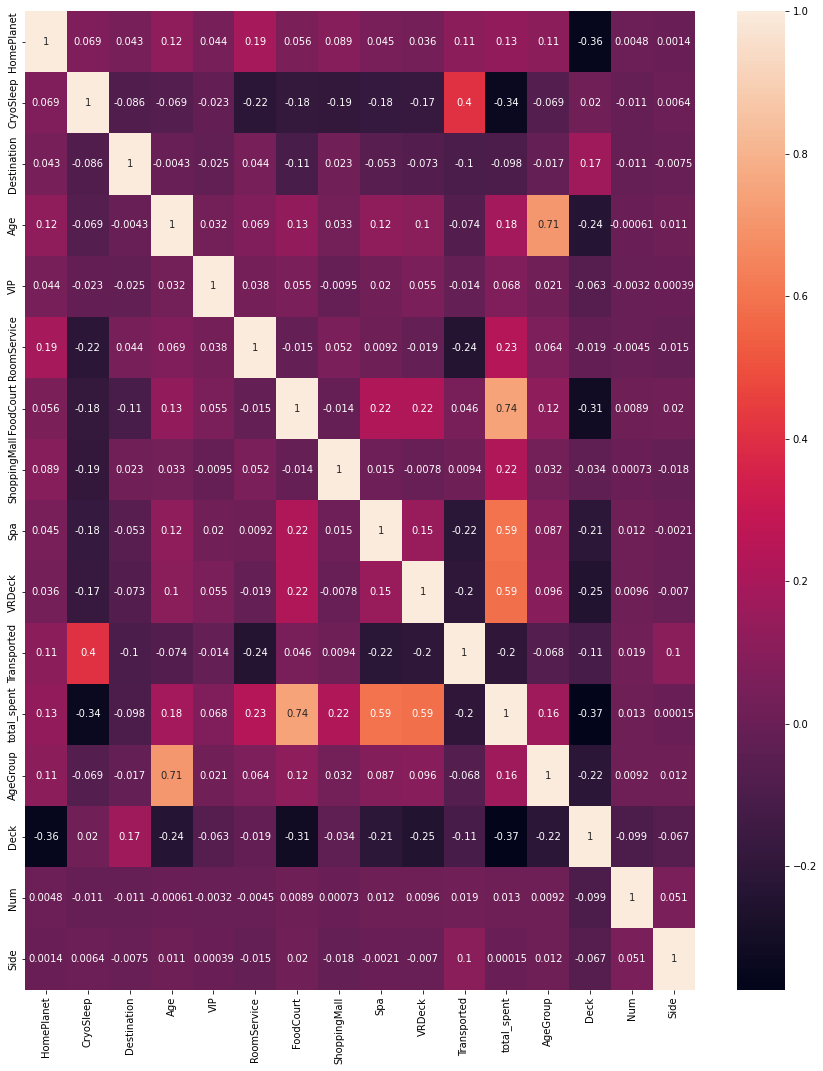

In [144]:
plt.figure(figsize=(15,18))
sns.heatmap(train.corr(), annot=True);